# CLASSIFICATION METRICS

<br>

## Introduction

<br>
There are many metrics that can be used to measure the performance of a classifier or predictor; different fields have different preferences for specific metrics due to different goals. For example, in medicine sensitivity and specificity are often used, while in computer science precision and recall are preferred. 

<br>
An important distinction is between metrics that are independent on the prevalence (how often each category occurs in the population), and metrics that do depend on the prevalence; both types are useful, but they have very different properties.

<br>
Some common error metrics for classification are :

<br>
<ul style="list-style-type:square">
    <li>
        precision and recall
    </li>
    <br>
    <li>
        accuracy (<b>ACC</b>)
    </li>
    <br>
    <li>
        F1 score
    </li>
    <br>
    <li>
        area under the curve (<b>AUC</b>)
    </li>
    <br>
    <li>
        sensitivity and specificity
    </li>
</ul>

In [1]:
# SETUP : importing

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import utilcompute as uc
from pprint import pprint
from sklearn import datasets, svm
import sklearn.multiclass as multi 

import sklearn.metrics as mtr
import sklearn.preprocessing as pre
import sklearn.ensemble as ens 
import sklearn.model_selection as ms

In [2]:
# SETUP : reading in the datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target


In [3]:
# DATA PREPROCESSING : class binarization

y = pre.label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


In [4]:
# DATA PREPROCESSING : adding noisy features to make the classification task harder

random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]


In [5]:
# GLOBAL PARAMETERS 

train_perc = 0.8
delimiter = int(len(x) * train_perc)
s = 1

print('train set size   : ', delimiter)
print('test  set size   : ', (len(x) - delimiter))
print()
print('seed : ', s)


train set size   :  120
test  set size   :  30

seed :  1


In [6]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, train_size = train_perc, random_state = s)

classifier = multi.OneVsRestClassifier(svm.SVC(kernel = 'linear', probability = True, random_state = random_state))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)


## Confusion Matrix

<br>
In the context of statistical classification, a confusion matrix is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. It is a special kind of contingency table with two dimensions (actual and predicted), and identical sets of classes in both dimensions (each combination of dimension and class is a variable in the contingency table).

<br>
The name stems from the fact that it makes it easy to see if the system is confusing two classes (commonly mislabelling one as another).

<br>
<table style="border:none; float:left; margin-top:0;">
    <tbody>
        <tr>
            <th style="background:white; border:none;" colspan="2" rowspan="2"></th>
            <th colspan="3" style="background:none;">Actual Class</th>
        </tr>
        <tr>
            <th>A (Positive)</th>
            <th>B (Negative)</th>
        </tr>
        <tr>
            <th rowspan="3" style="height:6em;">
                <div style="
                    display: inline-block; 
                    -ms-transform: rotate(-90deg); 
                    -webkit-transform: rotate(-90deg); 
                    transform: rotate(-90deg);;"
                >
                Predicted<br>
            Class</div>
            </th>
            <th>A</th>
            <td>True Positives</td>
            <td>False Positives</td>
        </tr>
        <tr>
            <th>B</th>
            <td>False Negatives</td>
            <td>True Negatives</td>
        </tr>
    </tbody>
</table>

## Terminology

<br>
<b>True Positive (TP)</b> : items correctly labeled as belonging to the positive class
<br> <br>
<b>False Positive (FP)</b> : items incorrectly labeled as belonging to the positive class
<br> <br>
<b>False Negative (FN)</b> : items incorrectly labeled as belonging to the negative class
<br> <br>
<b>True Negative (TN)</b> : items correctly labeled as belonging to the negative class

<!--
<style>
td { text-align: center; }
</style>

<table style="width:100%"  >
    <tr>
        <td align="left"><b>True Positive (TP)</b></td><td>items correctly labeled as belonging to the positive class</td>
    </tr>
    <tr>
        <td><b>False Positive (FP)</b></td><td>items incorrectly labeled as belonging to the positive class</td>
    </tr>
    <tr>
        <td><b>False Negative (FN)</b></td><td>items incorrectly labeled as belonging to the negative class</td>
    </tr>
    <tr>
        <td><b>True Negative (TN)</b></td><td>items correctly labeled as belonging to the negative class</td>
    </tr>
</table>
-->


## Precision and Recall

<br>
In a classification task, the <b>precision</b> (for a class) is the number of true positives divided by the total number of elements labeled as belonging to the positive class :

<br>
$
    \quad
    precision = \dfrac { TP } { TP + FP}
$

<br>
Similarly, <b>recall</b> is defined as the number of true positives divided by the total number of elements that actually belong to the positive class :

<br>
$
    \quad
    recall = \dfrac { TP } { TP + FN }
$

<br>
A precision score of 1.0 for a class C means that every item labeled as belonging to class C does indeed belong to the class (but says nothing about the number of items from class C that were not labeled correctly) whereas a recall score of 1.0 means that every item from class C was labeled as belonging to the class (but says nothing about how many other items were incorrectly also labeled as belonging to class C).

<br>
Usually, <b>precision and recall scores are not discussed in isolation</b>; instead, either values for one measure are compared for a fixed level at the other measure (e.g. precision at a recall level of 0.75) or both are combined into a single measure.

## Accuracy

<br>
The simplest statistic is <b>accuracy (ACC)</b>, which <b>represents the proportion of correct classifications to the total number of observations</b> :

<br>
$
    \quad
    \begin{align}
        ACC \ &= \ \frac{ (TP + TN) }{ \text{Total Population} } \ = \ \frac{(TP + TN)}{(TP + TN + FP + FN)}
    \end{align}
$

<br>
Accuracy is often not very useful, compared to the marginal ratios, as it does not yield useful marginal interpretations, due to mixing true positives and true negatives. It is <b>prevalence-dependent</b>.

## F1 Score

<br>
Another measure that combines precision and recall is the F1 score (also known as the traditional F-measure, or balanced F-score), which is a measure of a test accuracy and ranges from 0 to 1 :

<br>
$
    \quad
    \boldsymbol{F_1} \ = \ 2 \ \dfrac {1} { \tfrac{1}{\mathrm{recall}} + \tfrac{1}{\mathrm{precision}} } 
    \ = \ 2 \ \dfrac { \mathrm {precision} \cdot \mathrm {recall} }{\mathrm{precision} +\mathrm {recall} }
$

<br>
The F1 score is a special case of the general $F_\beta$ measure; when precision and recall are evenly weighted, the formula below yields the harmonic mean of the two : 

<br>
$
    \quad
    \boldsymbol{F_\beta} \ = \
        (1 + \beta^2) \ 
        \dfrac
            {\mathrm{precision} \cdot \mathrm{recall}}
            {(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}
$

<br>
The F-measure was derived so that $F_\beta$ measures the effectiveness of retrieval with respect to a user who attaches $\beta$ times as much importance to recall as to precision.

<br>
Outside of the field of information retrieval, the application of <b>precision, recall, and F-measure</b> are argued to be flawed as they <b>do not take true negatives into account</b>. Measures such as the Phi coefficient, Matthews correlation coefficient, Informedness or Cohen's kappa may be preferable to assess the performance of a binary classifier.


## Sensitivity and Specificity

<br>
Sensitivity and specificity are statistical measures of the performance of a binary classification task : 

<br>
<ul style="list-style-type:square">
    <li>
        <b>sensitivity</b> (also called true positive rate, or recall) <b>measures the proportion of positives that are
        correctly identified as such</b> or, equivalently, the ability of the classifier to avoid false negatives
    </li>
    <br>
    <li>
        <b>specificity</b> (also called true negative rate) <b>measures the proportion of negatives that are correctly
        identified as such</b> or, equivalently, the ability of the classifier to avoid false positives
    </li>
</ul>

<br>
$
    \quad
    \begin{align}
        sensitivity \ & = \ \dfrac { TP } { TP + FN }
        \newline
        specificity \ & = \ \dfrac { TN } { TN + FP }
    \end{align}
$

<br>
In the context of medical tests, sensitivity represents the percentage of sick people who are correctly identified as having the condition, whereas specificity is the percentage of healthy people who are correctly identified as not having the condition. A perfect predictor would be described as 100% sensitive (all sick individuals are correctly identified as sick), and 100% specific (no healthy individuals are incorrectly identified as sick).

<br>
For any test, <b>there is usually a trade-off between these two statitical measures, which can be represented graphically using a receiver operating characteristic (ROC) curve</b>.



## ROC Curve

<br>
The value returned by the classification model can be a real value (continuous output), in which case the classifier boundary between classes must be determined by a threshold value, or it can be a discrete class label indicating one of the classes.

<br>
<b>A receiver operating characteristic (ROC) curve is a graphical plot that illustrates the ability of a binary classifier system as its discrimination threshold is varied.</b> It provides the tools for selecting possibly optimal models and to discard suboptimal ones independently from the cost context or the class distribution.

<br>
<b>The ROC curve is created by plotting the true positive rate</b> (TPR, also called sensitivity or recall) <b>against the false positive rate</b> (FPR, also known as fall-out or probability of false alarm) <b>at various threshold settings</b>.The FPR can be calculated as (1 − specificity). The ROC curve is thus the sensitivity as a function of fall-out. 

<br>
Each prediction result or instance of a confusion matrix is represented by one point in the ROC space, defined as the cartesian coordinate system with the FPR on the x-axis and the TPR on the y-axis.

In [7]:
result = []
for i in range(n_classes):
    fpr, tpr, threshold = mtr.roc_curve(y_test[:, i], y_score[:, i])    
    auc = mtr.auc(fpr, tpr)
    result.append( {'class' : i, 'fpr' : fpr, 'tpr' : tpr, 'auc' : auc} )


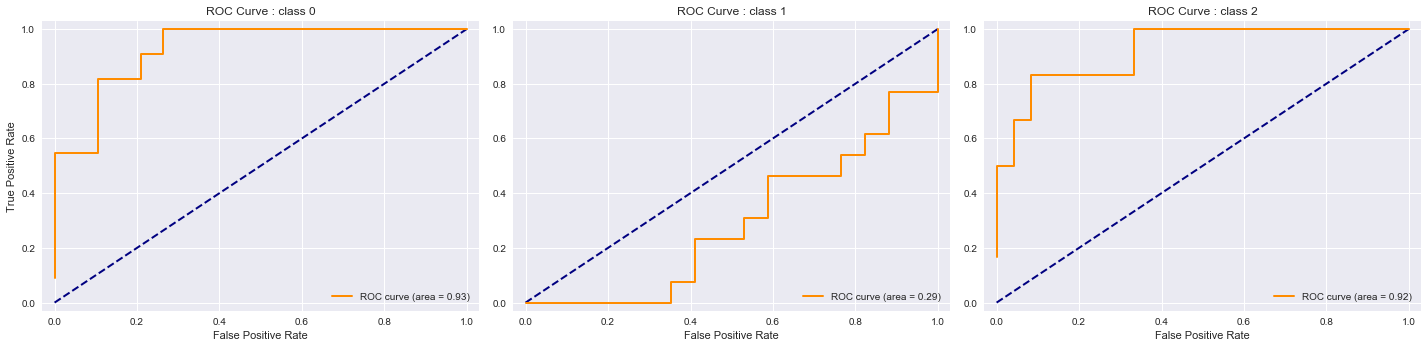

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = n_classes, figsize=(20, 5)) 

for i in range(n_classes):
    class_result = result[i]
    
    ax = axs[i]
    ax.set_xlim(-0.03, 1.03)
    ax.set_ylim(-0.03, 1.03)
    
    if (i == 0):
            ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')    
    title = ('ROC Curve : class {0}'.format(i))
    ax.set_title(title)
    
    label = 'ROC curve (area = %0.2f)' % result[i]['auc']
    
    ax.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle = '--')
    ax.plot(class_result['fpr'], class_result['tpr'], color = 'darkorange', lw = 2, label = label)    

    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


<br>
<b>The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing, respectively, 100% specificity (no false positives) and 100% sensitivity (no false negatives)</b>. The point (0,1) is also called a perfect classification. 

<br>
<b>A random guess would give a point along a diagonal line</b> (also known as the line of no-discrimination) from the left bottom to the top right corners (regardless of the positive and negative base rates). Points above the diagonal represent good classification results (better than random), whereas points below the line represent poor results (worse than random). Note that the output of a consistently poor predictor could simply be inverted to obtain a good predictor.

<br>
<b>Although any attempt to summarize the ROC Curve into a single number leads to a loss of information about the pattern of tradeoffs of the particular discriminator algorithm, summary statistics (e.g. AUC) do exists</b>.

<br>
<b>The extension of ROC curves for classification problems with more than two classes has always been cumbersome, as the degrees of freedom increase quadratically with the number of classes</b>, and the ROC space has $c(c-1)$ dimensions, where $c$ is the number of classes. Some approaches have been made for the particular case with three classes (three-way ROC) but, due to complexity in approximating the volume under the ROC surface (VUS), other approaches based on an extension of AUC are more popular as an evaluation metric.


## Area Under the Curve

<br>
When using normalized units, <b>the area under the curve</b> (AUC, or ROC-AUC) <b>corresponds to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one </b>(assuming positive ranks higher than negative).

The area under the curve is given by (the integral boundaries are reversed as large T has a lower value on the x-axis) :

<br>
$
    \quad
    AUC \ = \ \int _{\infty }^{-\infty } {\mbox{TPR}}(T) \big[ -{\mbox{FPR}}'(T) \big] dT
    \ = \ \int _{-\infty }^{\infty } \int _{-\infty }^{\infty } I(T'>T) \ f_{1}(T') \ f_{0}(T) \ dT' \ dT
    \ = \ P(X_{1}>X_{0})
$





## References

<br>
<ul style="list-style-type:square">
    <li>
        Wikipedia - Evaluation of Binary Classifiers <br>
        https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers
    </li>
    <br>
    <li>
        Wikipedia - Confusion Matrix <br>
        https://en.wikipedia.org/wiki/Confusion_matrix
    </li>
    <br>
    <li>
        Wikipedia - Precision and Recall <br>
        https://en.wikipedia.org/wiki/Precision_and_recall
    </li>
    <br>
    <li>
        Wikipedia - F1 Score <br>
        https://en.wikipedia.org/wiki/F1_score
    </li>
    <br>
    <li>
        Wikipedia - Sensitivity and Specificity <br>
        https://en.wikipedia.org/wiki/Sensitivity_and_specificity
    </li>
    <br>
    <li>
        Wikipedia - Receiver Operating Characteristic <br>
        https://en.wikipedia.org/wiki/Receiver_operating_characteristic
    </li>
</ul>